In [1]:
import numpy as np
from panda_control_client_KSJ import JsonrpcClient
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from collections import deque
import time
import rotation_utils as ru

In [2]:
server_ip = '192.168.0.97'
panda = JsonrpcClient(server_ip)
panda.connect()

Server IP: 192.168.0.97
Server port: 7078


True

In [70]:
end_off = np.array([
            [1, 0, 0, 0],   
            [0, 1, 0, 0],
            [0, 0, 1, 0.09500],
            [0, 0, 0, 1.0]     
        ], dtype=float)

In [3]:
jpos, jpos_nom, FT , cur_T, cur_p = panda.get_robot_states()

# test1 = cur_T @ end_off
# test2 = test1 @ np.linalg.inv(end_off)


print(jpos)
print(jpos_nom)
print(FT)
print("\n")
# print(cur_T[0])
# print(cur_T[1])
# print(cur_T[2])
# print(cur_T[3])
print(cur_T)



pose_Vec = ru.SE32PoseVec(cur_T)
print("\n")
print(pose_Vec)

cur_T = ru.PoseVec2SE3(pose_Vec)

print("\n")
print(cur_T)



print("\n")
print(cur_p)



# x, y, z = p_xyz
# rx, ry, rz = r_xyz

# print("\n")
# print(x, y, z)
# print("\n")
# print(rx, ry, rz)



# print("\n")
# print(test1[0])
# print(test1[1])
# print(test1[2])
# print(test1[3])

# print("\n")
# print(test2[0])
# print(test2[1])
# print(test2[2])
# print(test2[3])

[0.07909894540644528, 0.323212368593766, 0.09857703363230408, -2.2604674641123985, 0.01871503815220462, 2.5793107889625757, 0.8449406804286984]
[0.07909894540644528, 0.323212368593766, 0.09857703363230408, -2.2604674641123985, 0.01871503815220462, 2.5793107889625757, 0.8449406804286984]
[0.03999999910593033, -0.019999999552965164, -0.14000000059604645, -0.003000000026077032, -0.0035000001080334187, 0.0020000000949949026]


[[ 0.77226358 -0.63522565 -0.00986601  0.53099804]
 [-0.63443899 -0.7719305   0.04013082  0.0958991 ]
 [-0.033108   -0.02473219 -0.99914572  0.2177905 ]
 [ 0.          0.          0.          1.        ]]


[[ 0.53099804]
 [ 0.0958991 ]
 [ 0.2177905 ]
 [-2.9248305 ]
 [ 1.04803775]
 [ 0.03547266]]


[[ 0.77226358 -0.63522565 -0.00986601  0.53099804]
 [-0.63443899 -0.7719305   0.04013082  0.0958991 ]
 [-0.033108   -0.02473219 -0.99914572  0.2177905 ]
 [ 0.          0.          0.          1.        ]]


[0.5309980425610398, 0.09589910189809206, 0.21779049544319334, -2.

### Hall 위치 기준

In [12]:
# [[ 0.76966474 -0.6382486  -0.01596624  0.55423984]
#  [-0.6381404  -0.76982953  0.01180369  0.07052424]
#  [-0.01982497  0.00110382 -0.99980286  0.16584688]
#  [ 0.          0.          0.          1.        ]]




Target_Hall = np.array([0.5542398350380275, 0.07052423691185752, 0.16584688031918274, -2.9498042225219208, 1.0637981247253954, 0.029829951252900888])  
Target_Hall_zoff = np.array([0.5542398350380275, 0.07052423691185752, 0.21584688031918274, -2.9498042225219208, 1.0637981247253954, 0.029829951252900888])

In [13]:
q_des = np.array([0, -45, 0, -135, 0, 90, 45])*np.pi/180
panda.move_joint_to(q_des)

{'method': 'moveJointTo',
 'q_des': [0.0,
  -0.7853981633974483,
  0.0,
  -2.356194490192345,
  0.0,
  1.5707963267948966,
  0.7853981633974483]}

In [14]:
panda.move_task_to(Target_Hall_zoff)

{'method': 'moveTaskTo',
 'p_des': [0.5542398350380275,
  0.07052423691185752,
  0.21584688031918273,
  -2.9498042225219208,
  1.0637981247253954,
  0.029829951252900888]}

In [97]:
panda.move_task_to(Target_Hall)

{'method': 'moveTaskTo',
 'p_des': [0.5542398350380275,
  0.07052423691185752,
  0.16584688031918274,
  -2.9498042225219208,
  1.0637981247253954,
  0.029829951252900888]}

### Task Space이동

In [17]:


jpos, jpos_nom, FT , cur_T, cur_p = panda.get_robot_states()


cur_x,cur_y, cur_z, cur_rx, cur_ry, cur_rz = cur_p
print(cur_x,cur_y, cur_z, cur_rx, cur_ry, cur_rz)

#- 0.095

Target1 = np.array([cur_x+0.06 ,cur_y-0.00, cur_z -0.00, cur_rx, cur_ry, cur_rz])  

print(Target1)
print("\n")
print(FT[3])




panda.move_task_to(Target1)

0.30686656984315563 -3.5344803671128034e-06 0.5902117913943101 2.9017919825811207 -1.203153570924435 -0.0005230904461502657
[ 3.66866570e-01 -3.53448037e-06  5.90211791e-01  2.90179198e+00
 -1.20315357e+00 -5.23090446e-04]


-0.0035000001080334187


{'method': 'moveTaskTo',
 'p_des': [0.36686656984315563,
  -3.5344803671128034e-06,
  0.5902117913943101,
  2.9017919825811207,
  -1.203153570924435,
  -0.0005230904461502657]}

### 탐색 관련

In [4]:
import numpy as np
import time
import math

class PSFTGenerator:
    def __init__(self, start_pos, h=0.0005, d=0.001, theta_max=np.pi/4.0, r_min=0.001, r_max=0.02):
        """
        초기화 함수
        :param start_pos: [x, y] 탐색 중심 위치 (현재 로봇의 x, y)
        :param h: 한 스텝당 이동할 호의 길이 (속도 관련 계수)
        :param d: 한 주기당 반지름 증가량 (나선 간격)
        :param theta_max: 탐색 부채꼴 각도 (기본 45도)
        :param r_min: 최소 반지름
        :param r_max: 최대 반지름
        """
        self.center_pos = np.array(start_pos[:2]) # Z축 제외, X-Y 평면만 고려
        self.h = h
        self.d = d
        self.theta_max = theta_max
        self.r_min = r_min
        self.r_max = r_max
        
        # 상태 변수 초기화
        self._curr_r = self.r_min
        self._curr_theta = 0.0
        self._direction = 1.0 # 1.0 (CCW) or -1.0 (CW)
        self._is_active = True

    def update(self):
        if not self._is_active:
            return self.center_pos

        # --- 논문 Eq. 10 및 C++ 로직 구현 ---
        
        # 1. Theta 업데이트: theta_next = theta_prev + dir * atan(h / r)
        # r이 작을수록 각도가 많이 변함 (일정한 호의 길이 유지를 위해)
        delta_theta = math.atan(self.h / self._curr_r)
        self._curr_theta += self._direction * delta_theta

        # 2. Radius 업데이트: 와이퍼 운동을 하면서도 반지름은 서서히 증가
        # r_new = r_old + (d / 2pi) * |delta_theta|
        self._curr_r += (self.d / (2 * np.pi)) * delta_theta

        # 최대 반지름 제한
        if self._curr_r > self.r_max:
            self._curr_r = self.r_max

        # 3. 방향 전환 (와이퍼/부채꼴 운동 구현)
        # 현재 각도의 절대값이 설정한 theta_max를 넘으면 방향 반전
        if abs(self._curr_theta) >= self.theta_max:
            self._direction *= -1.0
            # 경계선 보정
            self._curr_theta = self.theta_max if self._curr_theta > 0 else -self.theta_max

        # 4. 좌표 변환 (Polar -> Cartesian)
        # 중심 위치 + (r * cos, r * sin)
        offset_x = self._curr_r * math.cos(self._curr_theta)
        offset_y = self._curr_r * math.sin(self._curr_theta)
        
        target_x = self.center_pos[0] + offset_x
        target_y = self.center_pos[1] + offset_y

        return np.array([target_x, target_y])

    def stop(self):
        self._is_active = False

In [ ]:
SEARCH_H = 0.0005        
SEARCH_D = 0.002         
SEARCH_THETA_MAX = np.pi/3 
CONTROL_FREQ = 0.05      # 시각화 갱신을 위해 약간의 딜레이 필요

# 1. 로봇 초기 상태 획득
jpos, jpos_nom, FT, cur_T, cur_p = panda.get_robot_states()
cur_x, cur_y, cur_z, cur_rx, cur_ry, cur_rz = cur_p

print(f"Start Search from: {cur_x:.4f}, {cur_y:.4f}")

# 2. PSFT 생성기 초기화
psft_gen = PSFTGenerator(
    start_pos=[cur_x, cur_y],
    h=SEARCH_H,
    d=SEARCH_D,
    theta_max=SEARCH_THETA_MAX,
    r_max=0.03
)

# 3. 실시간 Plot을 위한 변수 설정
traj_history_x = []
traj_history_y = []

# 그래프 초기화
fig, ax = plt.subplots(figsize=(6, 6))

try:
    while True:
        # --- 로봇 제어 로직 ---
        # 1. 다음 목표 좌표 생성
        next_xy = psft_gen.update()
        
        # 2. Target Pose 생성 (Z축은 유지하거나 살짝 누름)
        target_pose = np.array([
            next_xy[0], 
            next_xy[1], 
            cur_z, 
            cur_rx, cur_ry, cur_rz
        ])
        
        # 3. 로봇 이동 명령
        #panda.move_task_to(target_pose)
        
        # --- 실시간 시각화 로직 ---
        # 데이터 저장
        traj_history_x.append(next_xy[0])
        traj_history_y.append(next_xy[1])
        
        # 그래프 그리기 (이전 그래프 지우고 다시 그림)
        ax.clear()
        
        # 전체 궤적 (파란 실선)
        ax.plot(traj_history_x, traj_history_y, 'b-', alpha=0.5, label='Trajectory')
        # 현재 목표 지점 (빨간 점)
        ax.plot(next_xy[0], next_xy[1], 'ro', label='Current Target')
        # 시작 중심점 (검은 X)
        ax.plot(cur_x, cur_y, 'kx', label='Start Center')
        
        # 그래프 스타일 설정
        ax.set_title(f"Real-time PSFT Search\nR: {psft_gen._curr_r*1000:.2f}mm, Theta: {math.degrees(psft_gen._curr_theta):.1f}deg")
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.grid(True)
        ax.axis('equal') # X, Y 비율 1:1 유지 (원형 왜곡 방지)
        # ax.legend(loc='upper right') # 범례 필요시 주석 해제
        
        # 화면 업데이트
        display(fig)
        clear_output(wait=True) # wait=True로 설정해야 깜빡임이 덜함
        
        # --- 주기 조절 ---
        time.sleep(CONTROL_FREQ)
        
        # (옵션) FT 센서 확인하여 루프 종료 조건 추가 가능
        # _, _, FT_chk, _, _ = panda.get_robot_states()
        # if abs(FT_chk[2]) < 2.0: break

except KeyboardInterrupt:
    print("\nStopped by User")
    plt.close() # 루프 종료 시 그래프 닫기

except Exception as e:
    print(f"Error: {e}")


Stopped by User


In [ ]:
cal_T = panda.get_cur_T()
print(cal_T)

[[ 7.06873800e-01 -7.07339682e-01  7.44009675e-05  3.06886053e-01]
 [-7.07339683e-01 -7.06873803e-01 -1.34949541e-05 -7.58940853e-05]
 [ 6.21376114e-05 -4.30875272e-05 -9.99999997e-01  5.01796081e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [7]:
cur_T = panda.get_cur_T()
print(cur_T)

[[ 0.93304856 -0.06709112 -0.35343905  0.17917588]
 [ 0.06685105 -0.93300924  0.35358832  0.25485794]
 [-0.35348453 -0.35354284 -0.86605782  0.60461785]
 [ 0.          0.          0.          1.        ]]


In [ ]:
# Target_off = np.array([
#             [1, 0, 0, 0],   
#             [0, 1, 0, 0.09],
#             [0, 0, 1, 0],
#             [0, 0, 0, 1.0]     
#         ], dtype=float)
# jpos, jpos_nom, FT , cur_T = panda.get_robot_states()

# Target1 = Target_off @ cur_T
# #Target1 = cur_T #@ np.linalg.inv(end_off)
# print("\n")
# print(cur_T[0])
# print(cur_T[1])
# print(cur_T[2])
# print(cur_T[3])
# print("\n")
# print(Target1[0])
# print(Target1[1])
# print(Target1[2])
# print(Target1[3])
#poseVec : Rotation , Position


jpos, jpos_nom, FT , cur_T, cur_p = panda.get_robot_states()


cur_x,cur_y, cur_z, cur_rx, cur_ry, cur_rz = cur_p
print(cur_x,cur_y, cur_z, cur_rx, cur_ry, cur_rz)

#- 0.095

Target1 = np.array([cur_x ,cur_y, cur_z-0.095, cur_rx, cur_ry, cur_rz])  

print(Target1)


# print("\n")
# print(cur_T)

# Target_off = np.array([0.09,0,0,0,0,0])
# print("\n")
# print(Target_off)

# cur_pVec = ru.SE32PoseVec(cur_T)
# print("\n")
# print(cur_pVec)

# Target1 = (cur_pVec.flatten() + Target_off).tolist()

# print("\n")
# print(Target1)



# Target1_SE3 = ru.PoseVec2SE3(Target1)

# print("\n")
# print(Target1_SE3)








0.3978001431652818 -4.8096870711583524e-05 0.5766399256792798 -2.897148264363033 1.200056245953263 -0.02158679837914191
[ 3.02800143e-01 -4.80968707e-05  5.76639926e-01 -2.89714826e+00
  1.20005625e+00 -2.15867984e-02]


In [62]:
panda.set_ft_bias()
panda.custom_control_C_Imp()

{'method': 'customCIMP'}

In [102]:


jpos, jpos_nom, FT , cur_T, cur_p = panda.get_robot_states()


cur_x,cur_y, cur_z, cur_rx, cur_ry, cur_rz = cur_p
print(cur_x,cur_y, cur_z, cur_rx, cur_ry, cur_rz)

#- 0.095

Target1 = np.array([cur_x+0.06 ,cur_y-0.00, cur_z -0.00, cur_rx, cur_ry, cur_rz])  

print(Target1)
print("\n")
print(FT[3])




panda.move_task_to(Target1)

0.5589112346454349 0.07257149095743712 0.20554705624883687 -2.9098727027081437 1.0572232552343723 -0.012042662803710805
[ 0.61891123  0.07257149  0.20554706 -2.9098727   1.05722326 -0.01204266]


-0.001500000013038516


{'method': 'moveTaskTo',
 'p_des': [0.6189112346454348,
  0.07257149095743712,
  0.20554705624883687,
  -2.9098727027081437,
  1.0572232552343723,
  -0.012042662803710805]}

In [47]:
jpos, jpos_nom, FT , cur_T, cur_p = panda.get_robot_states()

print("\n")
print(cur_T)



[[ 0.82829708 -0.56026624 -0.00506922  0.54427418]
 [-0.56023997 -0.82831034  0.00575857  0.07213528]
 [-0.00742522 -0.00192982 -0.99997057  0.21498866]
 [ 0.          0.          0.          1.        ]]


In [20]:
q_des = np.array([45, -45, 0, -135, 30, 90, 45])*np.pi/180
panda.move_joint_to(q_des)

{'method': 'moveJointTo',
 'q_des': [0.7853981633974483,
  -0.7853981633974483,
  0.0,
  -2.356194490192345,
  0.5235987755982988,
  1.5707963267948966,
  0.7853981633974483]}

In [48]:
q_des = np.array([0, -45, 0, -135, 0, 90, 45])*np.pi/180
panda.move_joint_to(q_des)

{'method': 'moveJointTo',
 'q_des': [0.0,
  -0.7853981633974483,
  0.0,
  -2.356194490192345,
  0.0,
  1.5707963267948966,
  0.7853981633974483]}

In [73]:
q_des = np.array([0.04301829513489152, 0.03981365308532914, 0.09592728933079193, -2.0536524542423553, 0.017437459041585317, 2.1864804011980694, 0.6095842809850971])
panda.move_joint_to(q_des)


{'method': 'moveJointTo',
 'q_des': [0.04301829513489152,
  0.03981365308532914,
  0.09592728933079193,
  -2.0536524542423553,
  0.017437459041585317,
  2.1864804011980694,
  0.6095842809850971]}

In [74]:
q_des = np.array([0.030894536677184416, 0.35503867055551985, 0.07832491182005837, -2.198891267817452, 0.015618486350223051, 2.5628395110891895, 0.5054339765498456])
panda.move_joint_to(q_des)


{'method': 'moveJointTo',
 'q_des': [0.030894536677184416,
  0.35503867055551985,
  0.07832491182005837,
  -2.198891267817452,
  0.015618486350223051,
  2.5628395110891895,
  0.5054339765498456]}

In [ ]:
panda.set_ft_bias()
panda.custom_control_J_Imp()


{'method': 'customJIMP'}

In [17]:
panda.set_ft_bias()
panda.custom_control_C_Imp()

{'method': 'customCIMP'}

In [ ]:
panda.forward_kinematics()
# 지금 로봇 status 받아오는거 활용해서 수정하기
# 아니면 피노키오로 해버리기

In [19]:
panda.set_ft_bias()



jpos, jpos_nom, FT = panda.get_robot_states()





In [4]:
server_ip = '192.168.0.97'
panda = JsonrpcClient(server_ip)
panda.connect()

Server IP: 192.168.0.97
Server port: 7078


True

In [5]:
q_des = np.array([0, -45, 0, -135, 0, 90, 45])*np.pi/180
panda.move_joint_to(q_des)

{'method': 'moveJointTo',
 'q_des': [0.0,
  -0.7853981633974483,
  0.0,
  -2.356194490192345,
  0.0,
  1.5707963267948966,
  0.7853981633974483]}

In [3]:
panda.set_ft_bias()
panda.custom_control_PEG()

{'method': 'customPEG'}

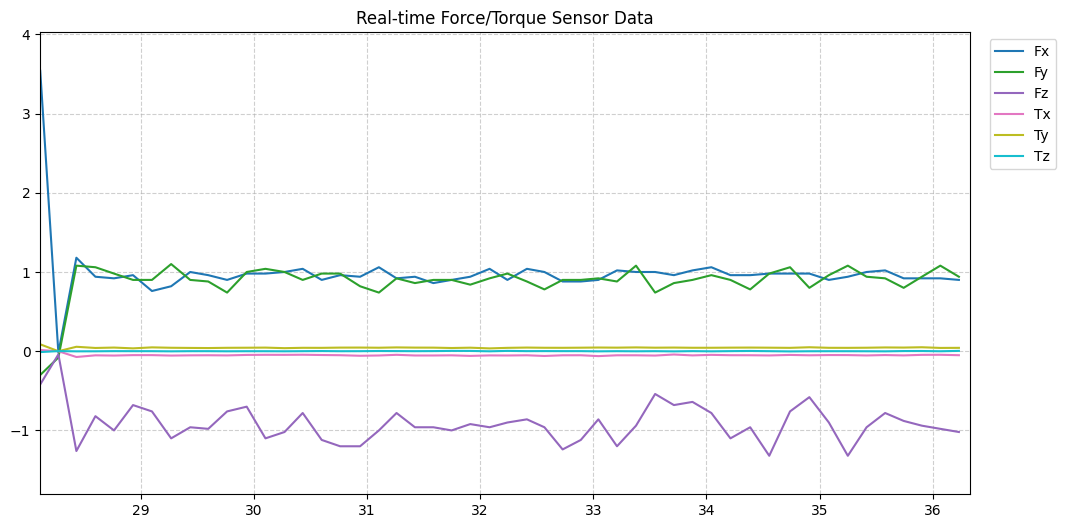

⏱ Time: 36.23 s
------------------------------------------------------------
 [Force ] Fx:   0.90 | Fy:   0.94 | Fz:  -1.02 (N)
 [Torque] Tx:  -0.05 | Ty:   0.04 | Tz:   0.00 (Nm)
------------------------------------------------------------

STOP.


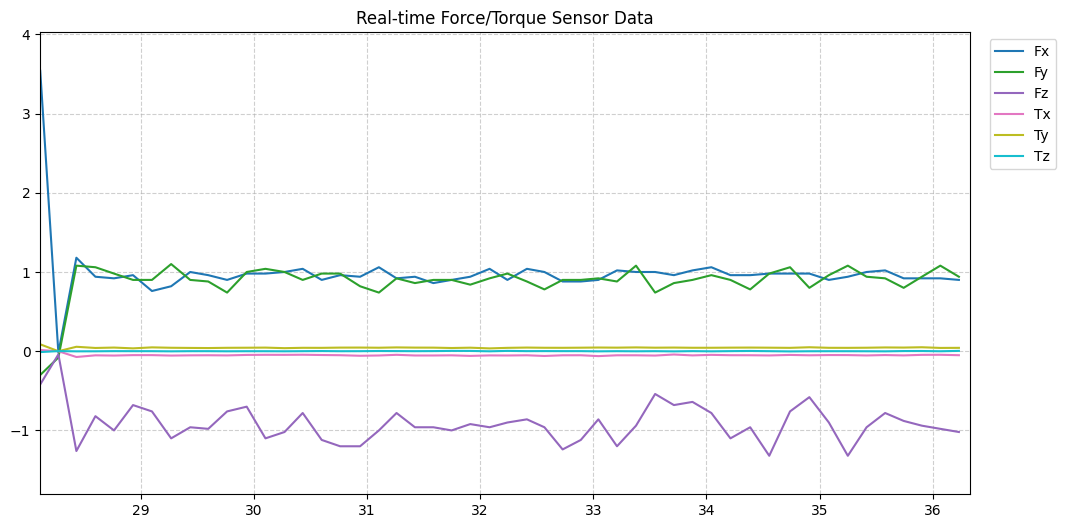

In [75]:
# panda.set_ft_bias()
# panda.custom_control_J_Imp()
# panda.set_ft_bias()
# panda.custom_control_C_Imp()

# panda.set_ft_bias()
# panda.custom_control_PEG()

# --- [설정 변경] ---
PLOT_MODE = 'FT'  # 옵션: 'FT', 'JPOS', 'JPOS_NOM', 'POSE' (추가됨)
WINDOW_SIZE = 50    # 그래프 X축 길이
Y_LIM_AUTO = True   # Pose는 위치(m)와 회전(rad) 스케일이 다르므로 Auto 추천
Y_LIM_MANUAL = [-1.0, 1.0] # 수동 설정 시 범위
# ------------------

data_buffer = [deque(maxlen=WINDOW_SIZE) for _ in range(7)] # 최대 7채널 버퍼 준비
time_buffer = deque(maxlen=WINDOW_SIZE)

fig, ax = plt.subplots(figsize=(12, 6))
lines = []

# --- [모드별 설정] ---
if PLOT_MODE == 'FT':
    labels = ['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz']
    num_channels = 6
    title = "Real-time Force/Torque Sensor Data"
elif PLOT_MODE == 'POSE': # [추가된 부분]
    labels = ['x', 'y', 'z', 'Rx', 'Ry', 'Rz']
    num_channels = 6
    title = "Real-time End-Effector Pose (Task Space)"
else: # JPOS or JPOS_NOM
    labels = [f'Joint {i+1}' for i in range(7)]
    num_channels = 7
    title = f"Real-time {PLOT_MODE} Data"

colors = plt.cm.tab10(np.linspace(0, 1, num_channels))
for i in range(num_channels):
    line, = ax.plot([], [], label=labels[i], color=colors[i], linewidth=1.5)
    lines.append(line)

ax.set_title(title)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.grid(True, linestyle='--', alpha=0.6)

try:
    start_time = time.time()
    
    while True:
        # cur_p: [x, y, z, rx, ry, rz] 라고 가정
        jpos, jpos_nom, FT , cur_T, cur_p = panda.get_robot_states()
        
        # --- [데이터 연결] ---
        if PLOT_MODE == 'FT':
            target_data = FT
        elif PLOT_MODE == 'JPOS_NOM':
            target_data = jpos_nom
        elif PLOT_MODE == 'POSE': # [추가된 부분]
            target_data = cur_p
        else:
            target_data = jpos

        
        curr_time = time.time() - start_time
        time_buffer.append(curr_time)
        
        for i in range(num_channels):
            data_buffer[i].append(target_data[i])

        for i in range(num_channels):
            lines[i].set_data(time_buffer, data_buffer[i])

        ax.set_xlim(min(time_buffer), max(time_buffer) + 0.1)
        
        if Y_LIM_AUTO:
            all_data = [val for ch in range(num_channels) for val in data_buffer[ch]]
            if all_data:
                y_min, y_max = min(all_data), max(all_data)
                margin = (y_max - y_min) * 0.1 if y_max != y_min else 1.0
                ax.set_ylim(y_min - margin, y_max + margin)
        else:
            ax.set_ylim(Y_LIM_MANUAL)

        clear_output(wait=True) 
        display(fig)

        print(f"⏱ Time: {curr_time:.2f} s")
        print("-" * 60)
        
        # --- [출력 포맷] ---
        if PLOT_MODE == 'FT':
            print(f" [Force ] Fx: {target_data[0]:6.2f} | Fy: {target_data[1]:6.2f} | Fz: {target_data[2]:6.2f} (N)")
            print(f" [Torque] Tx: {target_data[3]:6.2f} | Ty: {target_data[4]:6.2f} | Tz: {target_data[5]:6.2f} (Nm)")
        elif PLOT_MODE == 'POSE': # [추가된 부분]
            # 위치(m)는 소수점 4자리, 회전(rad)은 소수점 3자리 정도로 표현
            print(f" [Pos (m)] x: {target_data[0]:7.4f} | y: {target_data[1]:7.4f} | z: {target_data[2]:7.4f}")
            print(f" [Ori(rad)] Rx:{target_data[3]:7.3f} | Ry:{target_data[4]:7.3f} | Rz:{target_data[5]:7.3f}")
        else:
            j_str = " | ".join([f"J{i+1}: {val:6.3f}" for i, val in enumerate(target_data)])
            print(f" [Joints] {j_str}")
            
        print("-" * 60)

        time.sleep(0.05) 

except KeyboardInterrupt:
    print("\nSTOP.")

{'method': 'customKSJ'}

In [ ]:
q_des = np.array([0, -45, 0, -135, 0, 90, 45])*np.pi/180
panda.move_joint_to(q_des)